In [46]:
#Creation of two bubble charts (income VS food insecutity - unemployment VS food insecurity) 

#The size of the bubbles represent the number of COVID-19 cases per 100,000 (11/11/20)

In [47]:
import pandas as pd
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
# make the plots a little wider by default
%matplotlib inline
plt.style.use('ggplot')

In [48]:
from google.colab import files
files.upload()

Saving data_2020.csv to data_2020 (2).csv


{'data_2020.csv': b'State,Unemployment 2020,Food insecurity 2020,"Rate of Covid-19 cases per 100,000 11/11/20",Income ,,,,,,,,,,,,\r\nAlabama,4.4,5.467547293,4213,56200,,,,,,,,,,,,\r\nAlaska,8.1,7.508130762,2848,78394,,,,,,,,,,,,\r\nArizona,7.8,5.860227541,3615,70674,,,,,,,,,,,,\r\nArkansas,6.2,5.77926321,4117,54539,,,,,,,,,,,,\r\nCalifornia,8.2,3.988094568,2508,78105,,,,,,,,,,,,\r\nColorado,6.4,4.821059231,2404,72499,,,,,,,,,,,,\r\nConnecticut,8.2,4.773593459,2327,87291,,,,,,,,,,,,\r\nDelaware,5.1,5.756971177,2784,74194,,,,,,,,,,,,\r\nFlorida,6.4,6.680315169,3968,58368,,,,,,,,,,,,\r\nGeorgia,5.7,6.816572309,3877,56628,,,,,,,,,,,,\r\nHawaii,10.1,4.09711909,1153,88006,,,,,,,,,,,,\r\nIdaho,4.8,4.37218839,4221,65988,,,,,,,,,,,,\r\nIllinois,6.9,3.612085367,4034,74399,,,,,,,,,,,,\r\nIndiana,5,5.640007454,3258,66693,,,,,,,,,,,,\r\nIowa,3.6,4.065867428,5193,66054,,,,,,,,,,,,\r\nKansas,5.6,4.06157267,3625,73151,,,,,,,,,,,,\r\nKentucky,5.6,5.923450587,2790,55662,,,,,,,,,,,,\r\nLouisiana,8.3,7.0

In [54]:
df = pd.read_csv('data_2020 (2).csv')
df.head()

,State,Unemployment 2020,Food insecurity 2020,"Rate of Covid-19 cases per 100,000 11/11/20",Income,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Alabama,4.4,5.467547,4213.0,56200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,8.1,7.508131,2848.0,78394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,7.8,5.860228,3615.0,70674.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,6.2,5.779263,4117.0,54539.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,8.2,3.988095,2508.0,78105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#we want to delete the unnamed column with no value inside
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] #this piece of code is from 'https://www.codegrepper.com/code-examples/delphi/how+to+delete+Unnamed%3A+0+pandas'
df.head()

,State,Unemployment 2020,Food insecurity 2020,"Rate of Covid-19 cases per 100,000 11/11/20",Income
0,Alabama,4.4,5.467547,4213.0,56200.0
1,Alaska,8.1,7.508131,2848.0,78394.0
2,Arizona,7.8,5.860228,3615.0,70674.0
3,Arkansas,6.2,5.779263,4117.0,54539.0
4,California,8.2,3.988095,2508.0,78105.0


In [56]:
state_data = df['State'][0:50]
covid_data = df['Rate of Covid-19 cases per 100,000 11/11/20'][0:50]
unemployment_data = df['Unemployment 2020'][0:50]
income_data = df['Income '][0:50]
food_data = df['Food insecurity 2020'][0:50]

#we select the values we want i.e. we don't select the NaN values


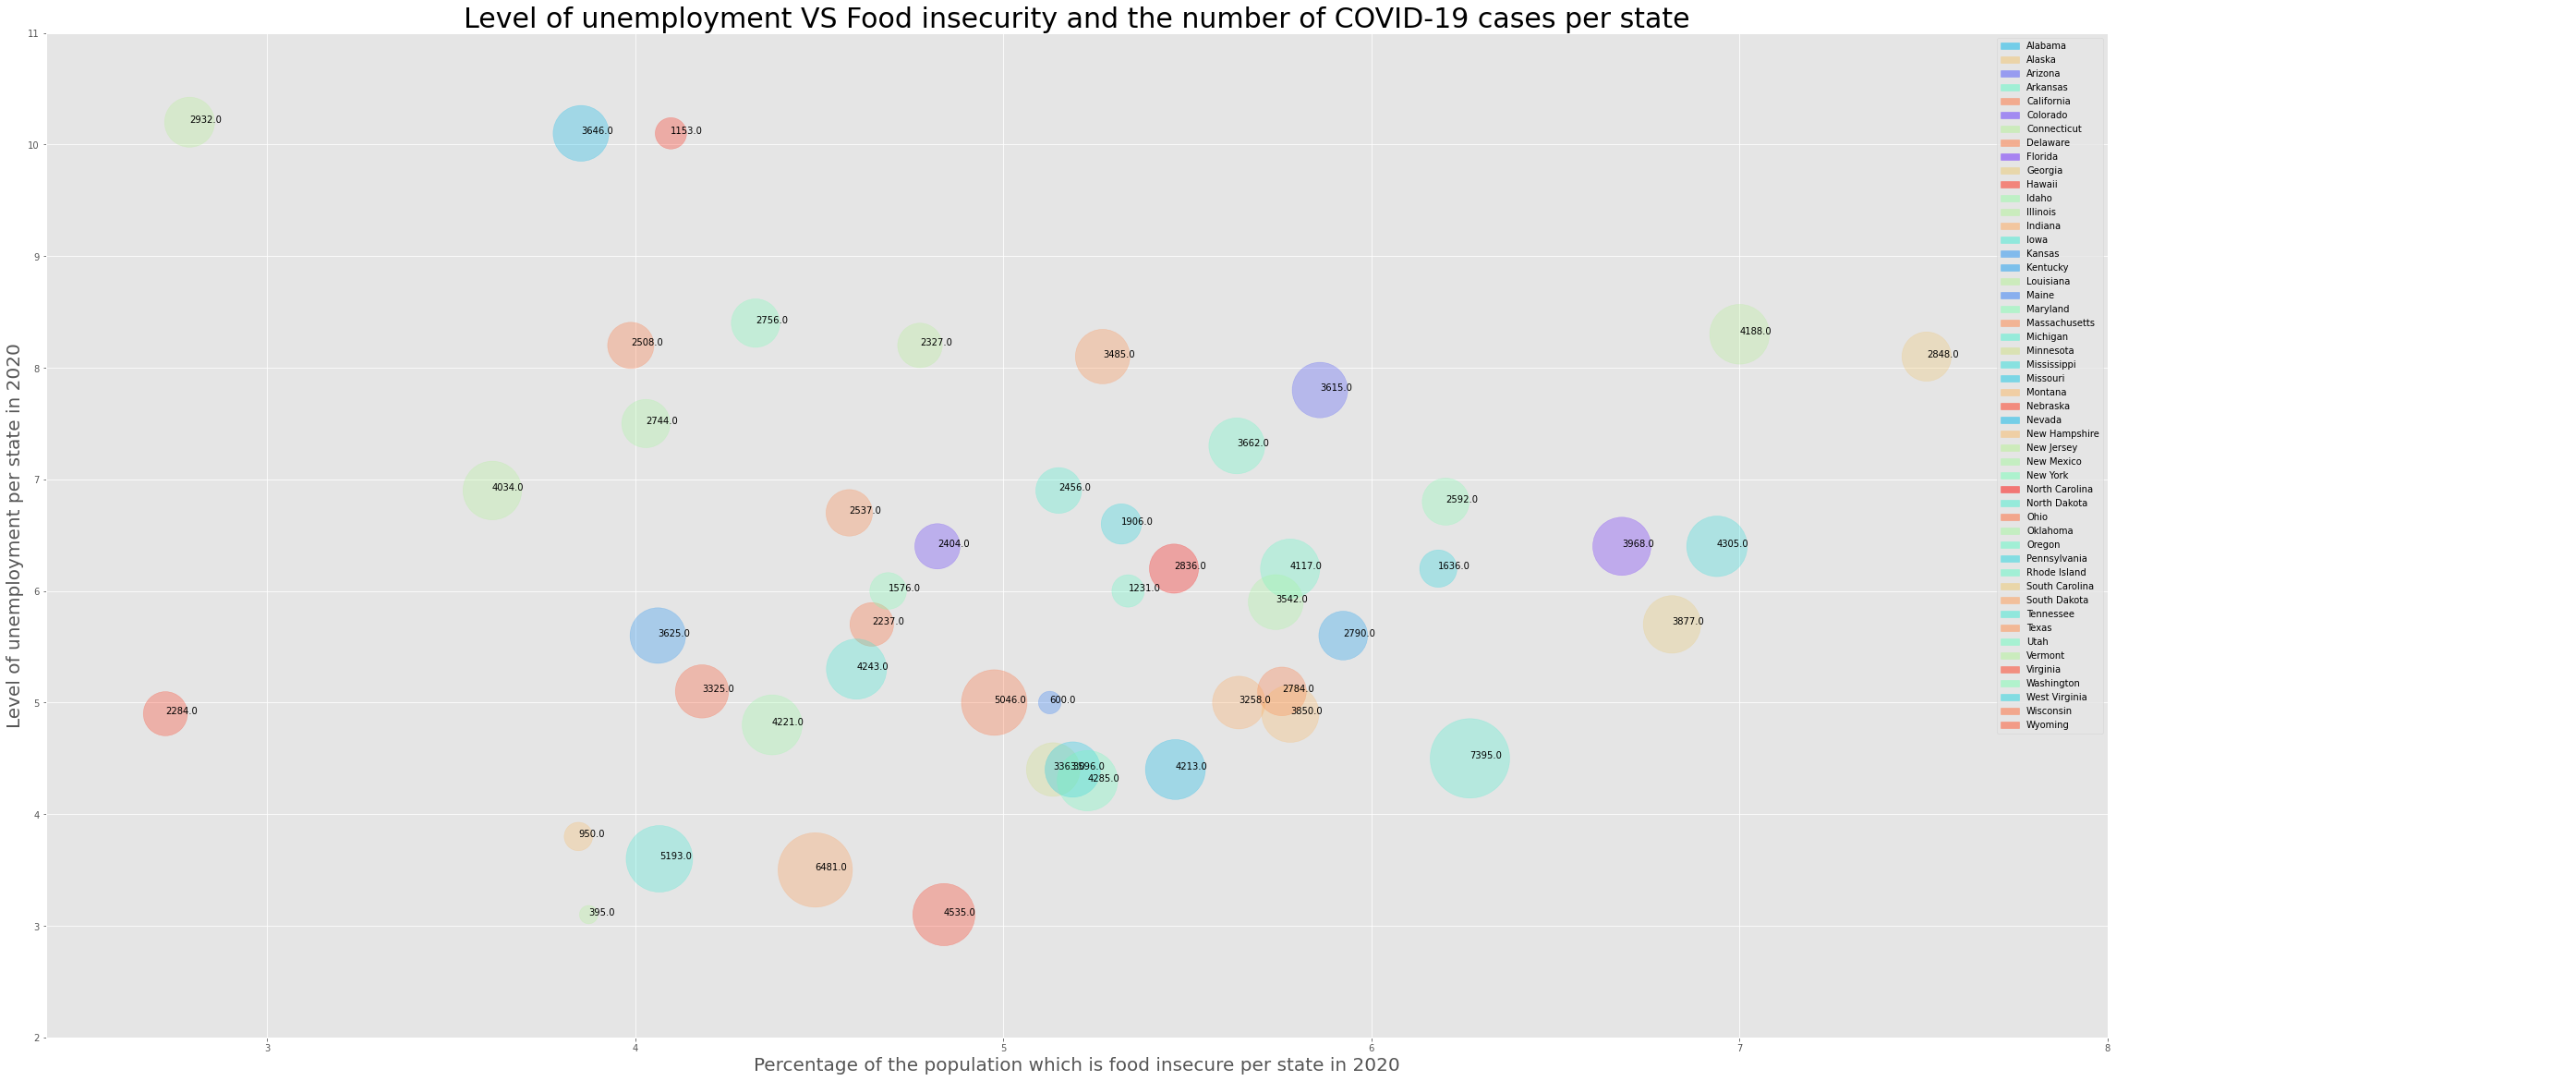

In [57]:
#1 Bubble chart - Unemployment VS food insecurity 

df1 = pd.DataFrame({
    'Food insecurity 2020': food_data,
    'Unemployment 2020': unemployment_data,
    'Bubble size': covid_data
})

#Choice of colours for each bubble
import matplotlib.cm as cm
import numpy as np
N=50
colors = cm.rainbow(np.random.rand(N))

#we plot our graph
plt.figure(figsize=(40,20))
plt.scatter('Food insecurity 2020', 'Unemployment 2020', s='Bubble size', alpha=0.3, data=df1, color=colors)

#we label the bubble
for i in range(N):
  plt.annotate(covid_data[i], xy=(food_data[i], unemployment_data[i]))

#we legend the plot
import matplotlib.patches as mpatches
legend_list=[]
for i in range(N):
    legend_list.append(mpatches.Patch(color=colors[i], alpha=0.5, label=state_data[i]))

plt.legend(handles=legend_list, markerscale=30)

#we define the range for x and y
plt.xlim(2.4, 8)
plt.ylim(2,11)

#we label our graph
plt.xlabel('Percentage of the population which is food insecure per state in 2020', size=20)
plt.ylabel('Level of unemployment per state in 2020', size=20)
plt.title('Level of unemployment VS Food insecurity and the number of COVID-19 cases per state', size=30)
plt.savefig('food.png')

#to plot this graph I used this https://datavizpyr.com/make-bubble-plot-in-python-with-matplotlib/ 

#to label and color the bubbles I used this https://stackoverflow.com/questions/35928486/bubble-chart-title-and-colors 

#for the legend I used https://www.youtube.com/watch?v=6fPBNp_XLxU 

Text(0.5, 1.0, 'Level of Income VS Food insecurity and the number of COVID-19 cases per state')

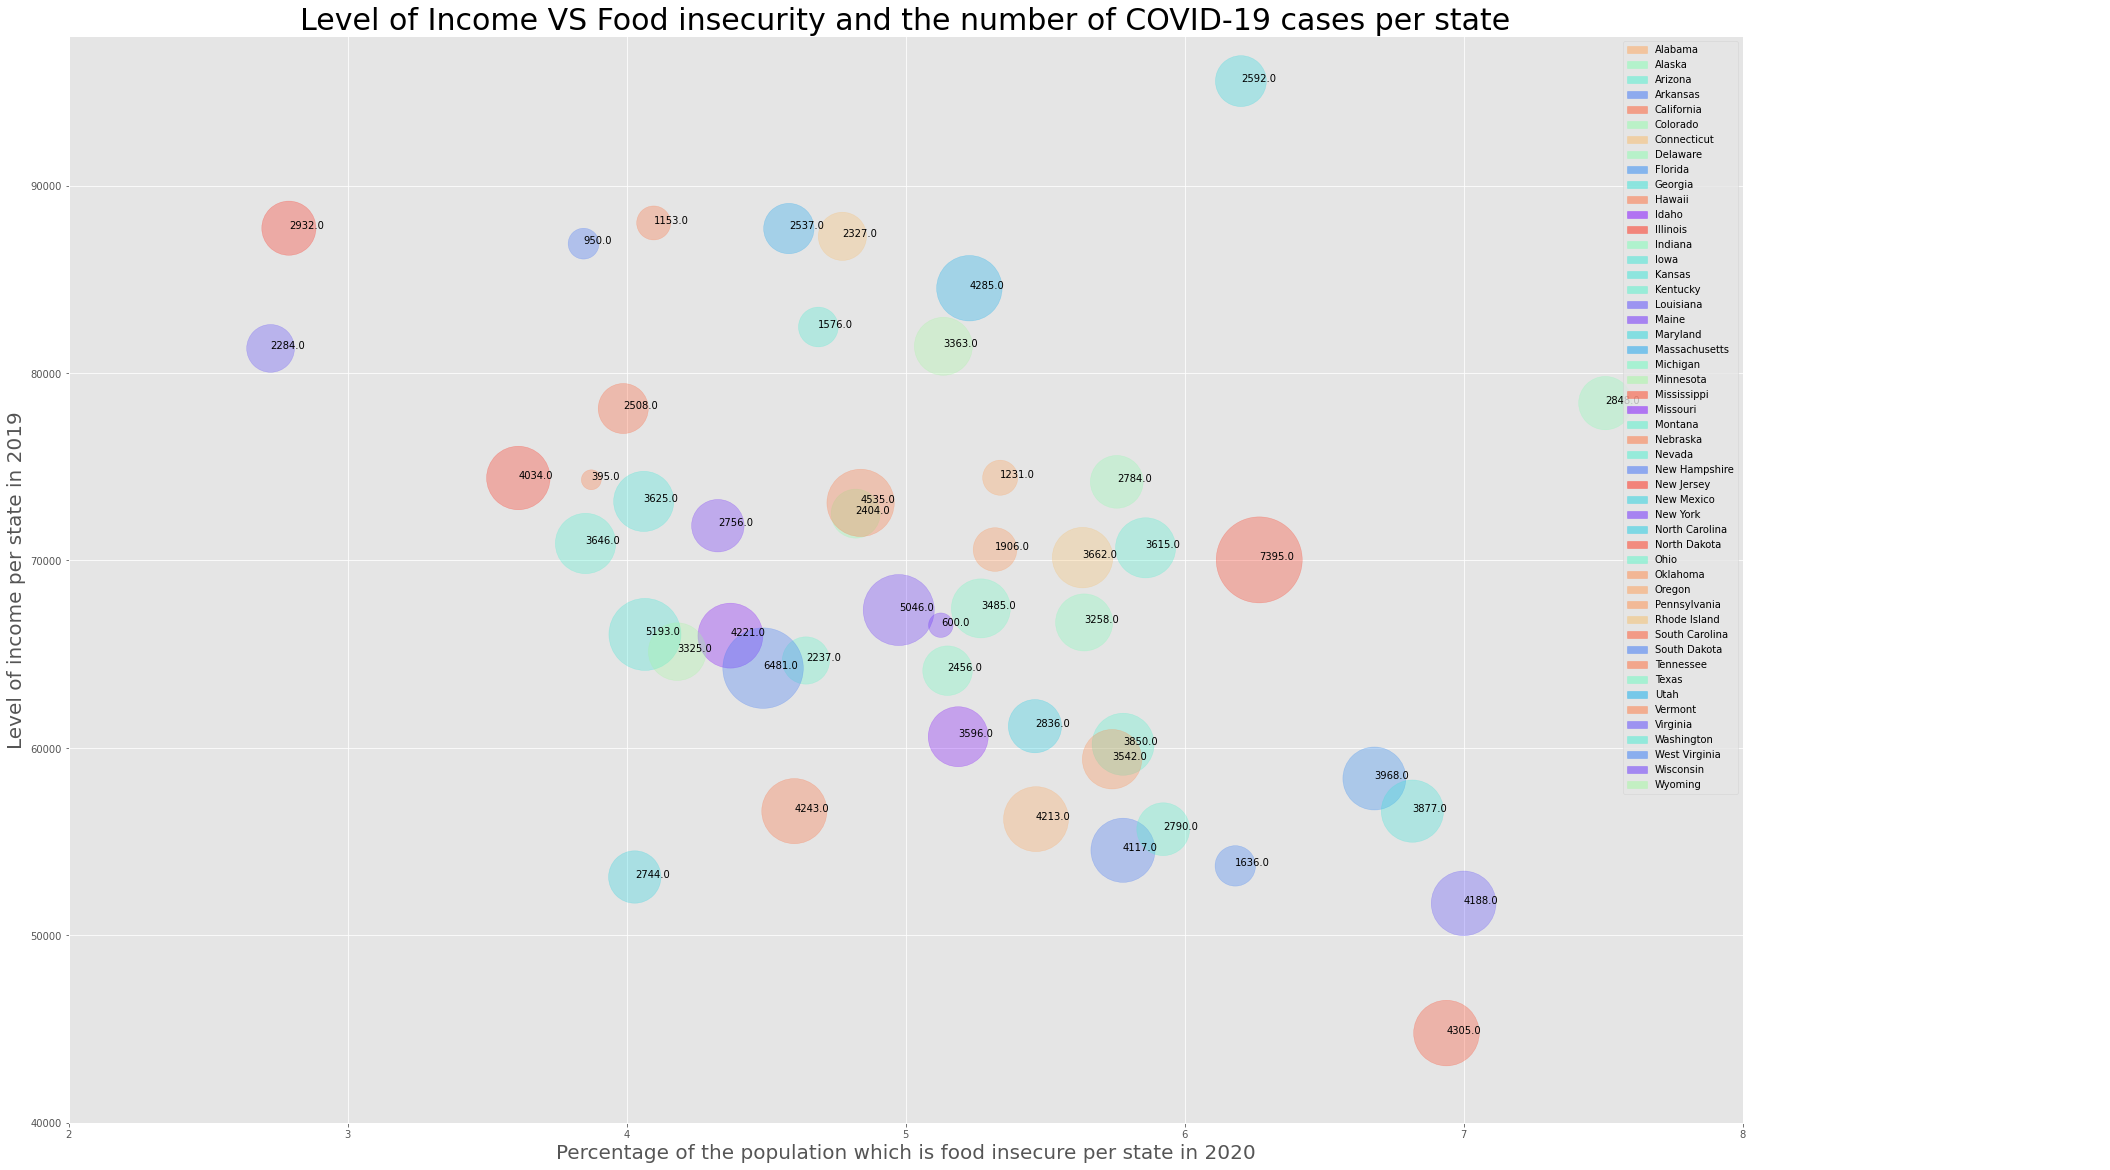

In [65]:
#2 Bubble chart - Income VS food insecurity 

df2 = pd.DataFrame({
    'Food insecurity 2020': food_data,
    'Income ': income_data,
    'Bubble size': covid_data
})

#Choice of colours for each bubble
import matplotlib.cm as cm
import numpy as np
N=50
colors = cm.rainbow(np.random.rand(N))

#we plot our graph
plt.figure(figsize=(30, 20))
plt.scatter('Food insecurity 2020', 'Income ', s='Bubble size', alpha=0.3, data=df2, color=colors)

#we label the bubble
for i in range(N):
  plt.annotate(covid_data[i], xy=(food_data[i], income_data[i]))

#we legend the plot
import matplotlib.patches as mpatches
legend_list=[]
for i in range(N):
    legend_list.append(mpatches.Patch(color=colors[i], alpha=0.5, label=state_data[i]))

plt.legend(handles=legend_list)

#we define the range for x and y
plt.xlim(2, 8)
plt.ylim(40000, 98000)

#we label our graph
plt.xlabel('Percentage of the population which is food insecure per state in 2020', size=20)
plt.ylabel('Level of income per state in 2019', size=20)
plt.title('Level of Income VS Food insecurity and the number of COVID-19 cases per state', size=30)

#to plot this graph I used this https://datavizpyr.com/make-bubble-plot-in-python-with-matplotlib/ 

#to label and color the bubbles I used this https://stackoverflow.com/questions/35928486/bubble-chart-title-and-colors 

#for the legend I used https://www.youtube.com/watch?v=6fPBNp_XLxU 